
#Drug Prescription Details Extraction Using PaddleOCR

## Mohsin Ali Mirza k200353 7A-BSCS

#1. Install Libraries

In [1]:
!python3 -m pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install "paddleocr>=2.0.1"

In [4]:
!mkdir images

In [3]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os

#Setup the model
ocr_model = PaddleOCR(lang='en')

In [8]:
from google.colab.patches import cv2_imshow
import cv2

#2. Setting Path for Image & Showing Image

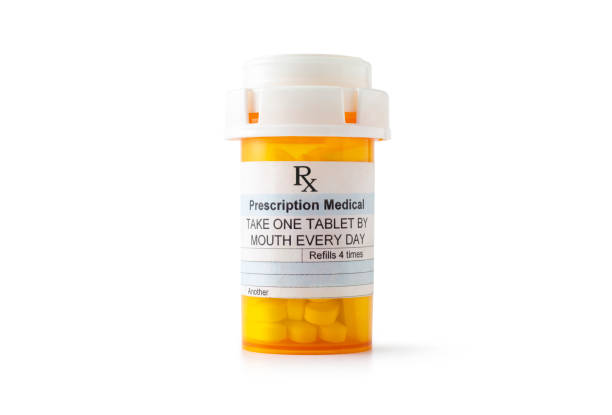

In [44]:
img_path = '/content/images/download.jpg'
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#3. Initializing OCR Model

`use_angle_cs` means look the text at an angle

In [18]:
#Setup the model
ocr_model = PaddleOCR(lang='en', use_angle_cls=True)

[2023/12/09 14:36:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

#Apply Inference

In [45]:
result = ocr_model.ocr(img_path)

[2023/12/09 15:00:14] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.3489112854003906
[2023/12/09 15:00:14] ppocr DEBUG: cls num  : 5, elapsed : 0.051906585693359375
[2023/12/09 15:00:15] ppocr DEBUG: rec_res num  : 5, elapsed : 0.8971462249755859


In [79]:
result

[[[[[291.0, 165.0], [319.0, 165.0], [319.0, 193.0], [291.0, 193.0]],
   ('R', 0.9775856733322144)],
  [[[247.0, 197.0], [366.0, 197.0], [366.0, 213.0], [247.0, 213.0]],
   ('Prescription Medical', 0.9685745239257812)],
  [[[246.0, 216.0], [367.0, 216.0], [367.0, 230.0], [246.0, 230.0]],
   ('TAKE ONE TABLET BY', 0.9114629030227661)],
  [[[250.0, 233.0], [366.0, 233.0], [366.0, 247.0], [250.0, 247.0]],
   ('MOUTH EVERY DAY', 0.9465550780296326)],
  [[[299.0, 249.0], [364.0, 249.0], [364.0, 260.0], [299.0, 260.0]],
   ('Refills 4 time', 0.8818637132644653)]]]

#Visualization

In [114]:
boxes = []
texts = []
scores = []

for res in result[0]:
  boxes.append(res[0])
  texts.append(res[1][0])
  scores.append(res[1][1])

In [115]:
from PIL import Image, ImageDraw, ImageFont
image = Image.open(img_path).convert('RGB')

font = ImageFont.load_default()
im_show = draw_ocr(image,boxes,texts,scores,font_path="/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf")
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


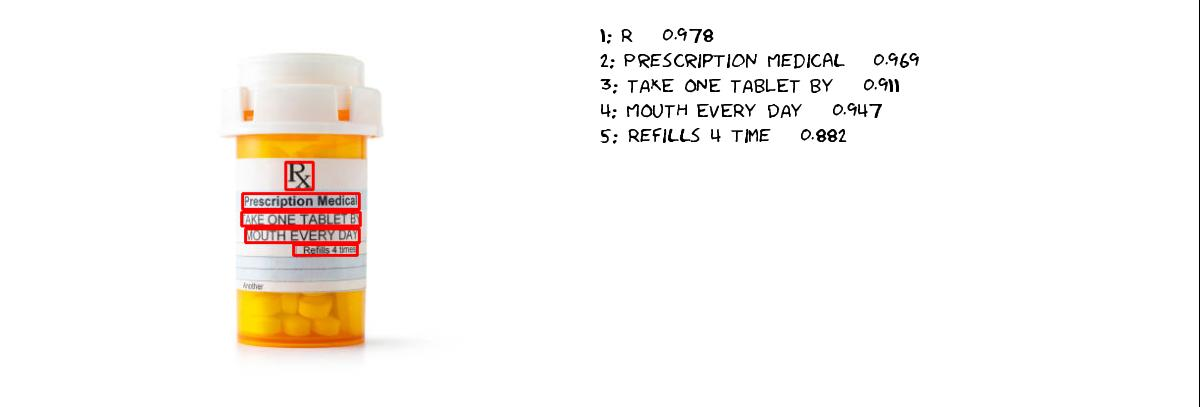

In [116]:
img = cv2.imread('/content/result.jpg',cv2.IMREAD_UNCHANGED)
cv2_imshow(img)